# Quiz Pekan - 3

Dataset-dataset berikut ini menunjukkan persentase fat, protein, dan food yang dikonsumsi dari setiap jenis makanan yang terdaftar. Beberapa bagian akhir dataset juga mencakup persentase obesitas(Obesity), kurang gizi(Undernourished), dan kasus COVID-19 yang Terkonfirmasi(Confirmed)/Kematian(Deaths)/Sembuh(Recovered)/Aktif(Active).

(Catatan: Semua data memiliki unit '%' (persen) kecuali Populasi, unit persen tersebut dihitung berdasarkan jumlah populasi).

Link Download:

[Food_Supply_Quantity_kg_Data.csv](https://drive.google.com/uc?export=download&id=1zGtWKaC7PwNJPk_LVaLRCsIscQROg8wJ)

[Protein_Supply_Quantity_Data.csv](https://drive.google.com/uc?export=download&id=1VcfsrpTwx_13O1su5CwHmpJvh9EVZLzi)

[Fat_Supply_Quantity_Data.csv](https://drive.google.com/uc?export=download&id=1u0jghgzsmnC6-XBs6NDQe_OWyjV0Dmxe)

[Supply_Food_Data_Descriptions.csv](https://drive.google.com/uc?export=download&id=1iaaEXmyTX-ACjwfLmSkEkLTdwWfbE-dH)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Import Semua Data
df_food = pd.read_csv('Food_Supply_Quantity_kg_Data.csv')
df_protein = pd.read_csv('Protein_Supply_Quantity_Data.csv')
df_fat = pd.read_csv('Fat_Supply_Quantity_Data.csv')
df_category = pd.read_csv('Supply_Food_Data_Descriptions.csv')

---

# Soal 1: Memisahkan kolom pada supply dataset antara kategori makanan dan bukan makanan

Teman-teman diminta untuk menampilkan list kolom-kolom pada supply DataFrame dengan ketentuan sebagai berikut:

*   all columns: list yang berisikan semua kolom pada supply DataFrame
*   supply columns: list yang berisikan semua kolom pada supply DataFrame berdasarkan kolom 'Categories' pada DataFrame df_category
*   non-supply columns: list yang berisikan semua kolom non-supply pada supply DataFrame


In [2]:
# Example
all_columns = df_food.columns.tolist()
print(f'All Columns : {all_columns} \n\n')

supply_columns = df_category['Categories'].tolist()
print(f'Supply Columns : {supply_columns} \n\n')

non_supply_columns = []
for i in all_columns:
    if i not in supply_columns:
        non_supply_columns.append(i)
print(f'Non supply Columns : {non_supply_columns} \n\n')

All Columns : ['Country', 'Alcoholic Beverages', 'Animal fats', 'Animal Products', 'Aquatic Products, Other', 'Cereals - Excluding Beer', 'Eggs', 'Fish, Seafood', 'Fruits - Excluding Wine', 'Meat', 'Milk - Excluding Butter', 'Miscellaneous', 'Offals', 'Oilcrops', 'Pulses', 'Spices', 'Starchy Roots', 'Stimulants', 'Sugar & Sweeteners', 'Sugar Crops', 'Treenuts', 'Vegetable Oils', 'Vegetables', 'Vegetal Products', 'Obesity', 'Undernourished', 'Confirmed', 'Deaths', 'Recovered', 'Active', 'Population', 'Unit (all except Population)'] 


Supply Columns : ['Alcoholic Beverages', 'Animal fats', 'Animal Products', 'Aquatic Products, Other', 'Cereals - Excluding Beer', 'Eggs', 'Fish, Seafood', 'Fruits - Excluding Wine', 'Meat', 'Milk - Excluding Butter', 'Miscellaneous', 'Offals', 'Oilcrops', 'Pulses', 'Spices', 'Starchy Roots', 'Stimulants', 'Sugar & Sweeteners', 'Sugar Crops', 'Treenuts', 'Vegetable Oils', 'Vegetables', 'Vegetal Products'] 


Non supply Columns : ['Country', 'Obesity', 'Unde

# Soal 2: Menggabungkan DataFrame



Gabungkan semua supply DataFrame dengan ketentuan tidak ada kolom dengan nama yang sama. Untuk kolom-kolom non-supply seperti tersebut di atas, memiliki nilai yang sama untuk setiap DataFrame, sehingga cukup ambil dari salah satu DataFrame. Sedangkan untuk kolom-kolom supply seperti tersebut di atas, setiap DataFrame (df_food, df_protein, df_fat) memiliki nilai yang berbeda, sehingga teman-teman perlu menambahkan suffix berdasarkan jenis supply DataFrame-nya, misalkan untuk kolom 'eggs' teman teman harus menambahkan suffix sehingga DataFrame gabungan memiliki kolom 'eggs_food', 'eggs_protein', dan 'eggs_fat'. Untuk mendapatkan gambaran lebih jelas, silahkan lihat pada expected output.

In [3]:
# Hint
df_non_supply_new = df_food[non_supply_columns]
df_food_new = df_food[['Country']+supply_columns]
df_protein_new = df_protein[['Country']+supply_columns]
df_fat_new = df_fat[['Country']+supply_columns]

In [4]:
# Selanjutnya gabungkan dataset pada hint di atas dengan menambahkan suffix berbeda untuk setiap supply dataset menggunakan pd.merge
# Code here

#df
df_FP = df_food_new.merge(df_protein_new, how='outer', on='Country', suffixes=('_food','_protein'))
df_FatP = df_fat_new.merge(df_protein, how='outer', on='Country', suffixes=('_fat','_protein'))

In [5]:
df = df_FP.merge(df_FatP)
df.head(10)

,Country,Alcoholic Beverages_food,Animal fats_food,Animal Products_food,"Aquatic Products, Other_food",Cereals - Excluding Beer_food,Eggs_food,"Fish, Seafood_food",Fruits - Excluding Wine_food,Meat_food,...,Vegetables_fat,Vegetal Products_fat,Obesity,Undernourished,Confirmed,Deaths,Recovered,Active,Population,Unit (all except Population)
0,Afghanistan,0.0014,0.1973,9.4341,0.0000,24.8097,0.2099,0.0350,5.3495,1.2020,...,0.3593,28.3684,4.5,29.8,0.102237,0.003794,0.085065,0.013379,38928000.0,%
1,Albania,1.6719,0.1357,18.7684,0.0000,5.7817,0.5815,0.2126,6.7861,1.8845,...,0.6503,17.9998,22.3,6.2,0.542600,0.014799,0.334743,0.193058,2838000.0,%
2,Algeria,0.2711,0.0282,9.6334,0.0000,13.6816,0.5277,0.2416,6.3801,1.1305,...,0.5145,35.5857,26.6,3.9,0.119647,0.004060,0.083797,0.031790,44357000.0,%
3,Angola,5.8087,0.0560,4.9278,0.0000,9.1085,0.0587,1.7707,6.0005,2.0571,...,0.1231,34.7010,6.8,25,0.019574,0.000670,0.008434,0.010470,32522000.0,%
4,Antigua and Barbuda,3.5764,0.0087,16.6613,0.0000,5.9960,0.2274,4.1489,10.7451,5.6888,...,0.2469,22.2995,19.1,NaN,0.113265,0.003061,0.098980,0.011224,98000.0,%
5,Argentina,4.2672,0.2234,19.3454,0.0000,8.4102,0.9979,0.4693,6.0435,7.0421,...,0.1878,19.6449,28.5,4.6,1.970615,0.052599,1.589748,0.328268,45377000.0,%
6,Armenia,0.4014,0.1833,13.5640,0.0000,7.2982,0.5783,0.2896,6.0989,2.2675,...,0.8717,20.3384,20.9,4.3,1.909709,0.034506,1.550203,0.325000,2956000.0,%
7,Australia,5.5436,0.3143,21.4175,0.0033,5.4979,0.4428,1.4264,4.1883,6.7049,...,0.2144,25.8901,30.4,<2.5,0.105945,0.003487,0.097072,0.005386,25754000.0,%
8,Austria,7.0215,0.8555,19.5654,0.0011,6.2116,0.7884,0.7562,4.6069,4.6810,...,0.2039,22.1762,21.9,<2.5,0.620586,0.009547,0.487413,0.123626,8914000.0,%
9,Azerbaijan,3.5969,0.2544,11.6416,0.0000,13.0898,0.5593,0.2020,4.7988,2.1513,...,0.6534,17.8802,19.9,<2.5,0.415334,0.006025,0.389365,0.019945,10108000.0,%


# Soal 3: Sorting dan Filtering

Dari DataFrame hasil penggabungan pada Soal 2 (atau gunakan salah satu supply DataFrame karena kolom nilai non-supply memiliki nilai yang sama), kemudian urutkan data (sort) berdasarkan kolom kematian ('Deaths') dari yang terbesar. Setelah itu lakukan perintah berikut:

- Print data hasil sorting
- Urutan ke berapakah Indonesia berdasarkan tingkat kematian akibat COVID-19 setelah diurutkan dari yang terbesar? Gunakan code mendapatkan nilainya! 
- Berapa persen dari terkonfirmasi jumlah kematian akibat COVID-19 di Indonesia? Hitung jumlah orang yang meninggal! Gunakan code mendapatkan nilainya! #hint: jumlah orang yang meninggal = populasi * kematian --> jangan lupa ada yang masih dalam persen


In [6]:
# Urutkan (sorting) dan print hasil sorting
# Code here
sort = df.sort_values(by=['Deaths'])
df_rank = sort[['Country','Deaths']]

In [7]:
# Urutan ke berapakah Indonesia
# Code here
sort['rank'] = df['Deaths'].rank(method='max')
df_sort = sort[['Country','rank']]
data_Ind = sort.loc[sort.values=='Indonesia']

In [36]:
# Berapa persen jumlah kematian di Indonesia? Berapa Jumlahnya?
# Code here

meninggal_persen = data_Ind['Deaths'].values
meninggal = data_Ind['Population'].values*meninggal_persen

e = float(meninggal_persen)
f = float(meninggal)
print(f'Jumlah yang meninggal di Indonesia ada',e, ',10% dari jumlah populasi.') # 10 digit
print(f'Jumlah yang meninggal di Indonesia ada', f, 'orang.')

Jumlah yang meninggal di Indonesia ada 0.00435859409212516 ,10% dari jumlah populasi.
Jumlah yang meninggal di Indonesia ada 1184399.9999999988 orang.


---

# Soal 4: Binning, Grouping, dan Aggregating data

Lakukan binning pada kolom terkonfirmasi (Confirmed) COVID-19 dari DataFrame df_fat menjadi 5 bagian (q=5). Teman-teman dapat menggunakan fungsi qcut untuk melakukan bininng ini. Masukan data hasil binning tersebut menjadi kolom baru pada DataFrame df_fat. Beri nama kolom tersebut dengan 'Confirmed Category'. Berikan label 'Sangat Tidak Banyak', 'Tidak Banyak', 'Sedang', 'Cukup Banyak', 'Sangat Banyak'.

Baca dokumentasi berikut untuk fungsi qcut : https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.qcut.html

Kemudian lakukan perintah-perintah berikut:
- Buat DataFrame baru yang berisi data grouping berdasarkan kolom hasil bininng atau kolom 'Confirmed Category'. 
- Lakukan grouping hanya pada kolom 'Obesity', 'Meat', 'Fruits - Excluding Wine', 'Fish, Seafood', 'Animal Products', 'Vegetal Products' saja.
- Kemudian aggregate dengan fungsi mean. (df_baru = df_fat.groupby(...).mean())
- Save DataFrame hasil binning, grouping, dan aggregating ke dalam file csv.

In [9]:
# Lakukan binning pada kolom terkonfirmasi untuk DataFrame df_fat
labels = ['Sangat Tidak Banyak', 'Tidak Banyak', 'Sedang', 'Cukup Banyak', 'Sangat Banyak']

# Code here
df_fat['Confirmed Category'] = pd.qcut(df_fat['Confirmed'], 5, labels=labels)

In [10]:
# Lakukan grouping pada kolom hasil binning ('Confirmed Category'), kemudian aggregate menggunakan fungsi mean
cols = ['Obesity', 'Meat', 'Fruits - Excluding Wine', 'Fish, Seafood', 'Animal Products', 'Vegetal Products']

# Code here
groupby_confirmed = df_fat.groupby(by = 'Confirmed Category')[cols].mean()
groupby_confirmed

,Obesity,Meat,Fruits - Excluding Wine,"Fish, Seafood",Animal Products,Vegetal Products
Confirmed Category,,,,,,
Sangat Tidak Banyak,10.484375,10.010327,0.747706,0.997418,17.430627,32.569509
Tidak Banyak,14.187500,7.769187,0.469666,0.819738,16.458350,33.542409
Sedang,20.596875,8.822713,0.526259,0.846625,21.883681,28.115884
Cukup Banyak,22.381250,9.434041,0.392972,0.488641,23.509800,26.491209
Sangat Banyak,24.812500,10.779006,0.610634,0.878213,24.541656,25.457866


In [11]:
# Save DataFrame hasil binning, grouping, dan aggregating

groupby_confirmed.to_csv('groupby_confirmed.csv')

---

# Soal 5: Bar plot

Gunakan data grouping pada soal sebelumnya untuk melakukan visualisasi. Jika kalian tidak dapat menyelesaikan soal tersebut, maka silahkan [download](https://drive.google.com/uc?export=download&id=17-YC-2WdbHWl6L-clRxYNawo9qMhyilD) data berikut yang merupakan hasil dari data grouping soal 4.

Normalisasi data hasil grouping tersebut dengan rumus min-max normalisasi seperti rumus berikut ini. Kemudian buatlah grouping Visualization dengan berplot, visualisasikan data column 'Obesity', 'Fruits - Excluding Wine', 'Fish, Seafood', 'Animal Products' dan 'Vegetal Products'. 

\begin{equation*}
 X_{norm} = \dfrac{X - X_{min}}{X_{max} - X_{min}}
\end{equation*}


In [12]:
# Gunakan DataFrame hasil grouping soal 4 atau read data hasil download jika tidak dapat mengerjakan soal 4
df = groupby_confirmed

# Atau

df = pd.read_csv('groupby_confirmed.csv')

# Lihat df dan pastikan sesuai dengan expected output pada soal 4
display(df)

,Confirmed Category,Obesity,Meat,Fruits - Excluding Wine,"Fish, Seafood",Animal Products,Vegetal Products
0,Sangat Tidak Banyak,10.484375,10.010327,0.747706,0.997418,17.430627,32.569509
1,Tidak Banyak,14.187500,7.769187,0.469666,0.819738,16.458350,33.542409
2,Sedang,20.596875,8.822713,0.526259,0.846625,21.883681,28.115884
3,Cukup Banyak,22.381250,9.434041,0.392972,0.488641,23.509800,26.491209
4,Sangat Banyak,24.812500,10.779006,0.610634,0.878213,24.541656,25.457866


In [13]:
# Lakukan normalisasi pada DataFrame df
def norm (x):
    a = x-x.min()
    b=x.max()-x.min()
    return a/b
obs = norm(df['Obesity'])
m = norm(df['Meat'])
f = norm(df['Fruits - Excluding Wine'])
fish = norm(df['Fish, Seafood'])
a = norm(df['Animal Products'])
v = norm(df['Vegetal Products'])
c = df['Confirmed Category']

In [14]:
data = pd.DataFrame(obs)
data['Meat'] = m
data['Fruits - Excluding Wine'] = f
data['Fish, Seafood']=fish
data['Animal Products']=a
data['Vegetal Products']=v
data['Confirmed Category'] = c

In [15]:
df_norm = data.set_index('Confirmed Category')

In [16]:
df_norm

,Obesity,Meat,Fruits - Excluding Wine,"Fish, Seafood",Animal Products,Vegetal Products
Confirmed Category,,,,,,
Sangat Tidak Banyak,0.000000,0.744610,1.000000,1.000000,0.120282,0.879659
Tidak Banyak,0.258451,0.000000,0.216201,0.650769,0.000000,1.000000
Sedang,0.705780,0.350029,0.375739,0.703617,0.671177,0.328778
Cukup Banyak,0.830316,0.553141,0.000000,0.000000,0.872347,0.127817
Sangat Banyak,1.000000,1.000000,0.613593,0.765702,1.000000,0.000000


<ipython-input-17-462cff9ab4de>:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['0','Obesity', 'Meat', 'Fruits - Excluding Wine', 'Fish, Seafood', 'Animal Products', 'Vegetal Products'])


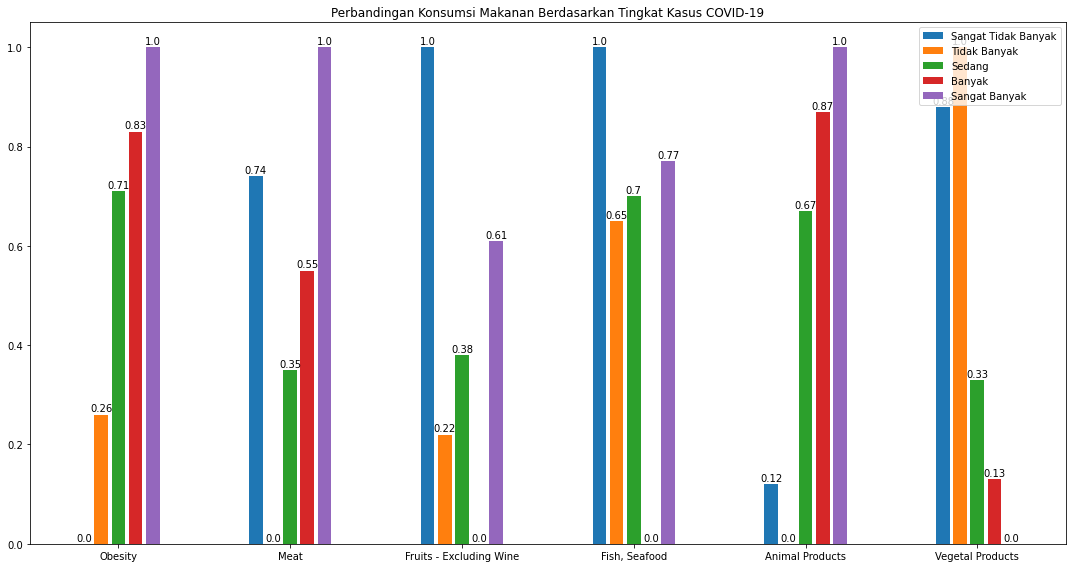

In [17]:
# Buat bar plot dari df_norm sesuai dengan expected output
# Untuk menambahkan label di atas barplot lihat https://matplotlib.org/3.1.1/gallery/lines_bars_and_markers/barchart.html
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(0,60,10)
y = np.round(df_norm.values[0],decimals=2)
y2 = np.round(df_norm.values[1],decimals=2)
y3 = np.round(df_norm.values[2],decimals=2)
y4 = np.round(df_norm.values[3],decimals=2)
y5 = np.round(df_norm.values[4],decimals=2)

fig, ax = plt.subplots(figsize=(15,8))
bar1 = ax.bar(x-2,y, label = 'Sangat Tidak Banyak')
bar2 = ax.bar(x-1,y2, label = 'Tidak Banyak')
bar3 = ax.bar(x,y3, label = 'Sedang')
bar4 = ax.bar(x+1,y4, label = 'Banyak')
bar5 = ax.bar(x+2,y5, label = 'Sangat Banyak')
ax.set_title('Perbandingan Konsumsi Makanan Berdasarkan Tingkat Kasus COVID-19')
ax.legend(loc='upper right')
ax.set_xticklabels(['0','Obesity', 'Meat', 'Fruits - Excluding Wine', 'Fish, Seafood', 'Animal Products', 'Vegetal Products'])

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 1), 
                    textcoords="offset points",
                    ha='center', va='bottom')
        
autolabel(bar1)
autolabel(bar2)
autolabel(bar3)
autolabel(bar4)
autolabel(bar5)
fig.tight_layout()

plt.show()

---

# Soal 6: Scatter plot


Buatlah visualisasi scatter plot dari df_food antara Supply Sayuran ('Vegetal Products') dan persentase terkonfirmasi ('Confirmed') COVID-19 sesuai expected output dengan ketentuan berikut:


* Gunakan kolom persentase kematian ('Death') sebagai ukuran pointnya kalikan suatu angka yang cukup besar agar terlihat.
    
* Gunakan kolom persentase produk hewani ('Animal Products') sebagai warna point, berikan colormap 'viridis'.

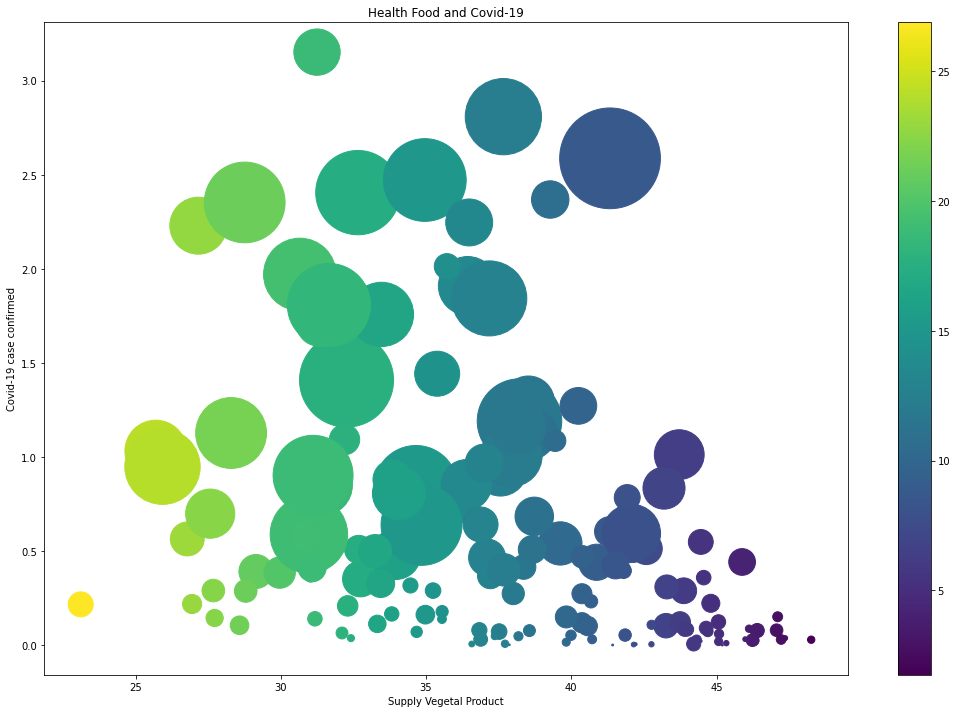

In [18]:
fig, ax = plt.subplots(figsize=(18, 12))

# Code here
graph = ax.scatter(df_food['Vegetal Products'], df_food['Confirmed'], s=df_food['Deaths']*100000, c=df_food['Animal Products'], cmap='viridis')
fig.colorbar(graph)
ax.set_title('Health Food and Covid-19')
ax.set_xlabel('Supply Vegetal Product')
ax.set_ylabel('Covid-19 case confirmed')
plt.show()